In [2]:
# preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# classifiers & performance metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

# **Global Visualization**

In [3]:
labelsize = 15

plt.rcParams['figure.figsize'] = 15,12
plt.rcParams["axes.titlesize"]= labelsize*0.8
plt.rcParams["axes.labelsize"]=labelsize
plt.rcParams["lines.linewidth"]=0.5
plt.rcParams["lines.markersize"]=5
plt.rcParams["xtick.labelsize"]=labelsize*0.8
plt.rcParams["ytick.labelsize"]=labelsize*0.8
plt.rcParams["font.family"] = "monospace"
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams["legend.fontsize"] = labelsize*0.6
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.title_fontsize"] = labelsize*0.6
plt.style.use('ggplot')

# **Load Data**

In [4]:
breast_cancer = pd.read_csv('data/breast-cancer.csv')
breast_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


> # Exploratory Data Analysis (EDA)
Exploratory data analysis (EDA) is used to analyze datasets to extract characteristic information and to obtain a bird's eye view on the features of our data. This helps us to discover any patterns, spot anomalies and test a hypothesis, using basic statistical exploration and visualisation tools. A preliminary look over the dataset tells us the following:
- 'id' is irrelevant for our task
- 'diagnosis' holds values of our classes
- 'Unnamed:32' includes null values

In [10]:
# Drop irrelevant column: id
breast_cancer.drop(['id'], axis = 1, inplace = True)

In [11]:
# Statistical description of data
breast_cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [13]:
# Split dataset into independent & dependent datasets for more streamlined exploration
X = breast_cancer.drop('diagnosis', axis = 1)
Y = breast_cancer['diagnosis']

#### *Violin plots are a great tool to depict distributions of numerical data. They combine features of box plot and kernel density plots. Here, we will use violin plots to compare the distributions of variables under benign and malignant conditions*

In [14]:
def violinplot(data_norm, data_diag, start_idx, stop_idx):
    data = pd.concat([data_diag,data_norm.iloc[:,start_idx:stop_idx]],axis=1)
    data = pd.melt(data,id_vars="diagnosis",
                        var_name="features",
                        value_name='value')
    sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
    plt.xticks(rotation=90)
    plt.show()

In [15]:
# Prepare data for violin plot visualisation
data_diag = Y
data = X
data_norm = (data - data.mean()) / (data.std())  

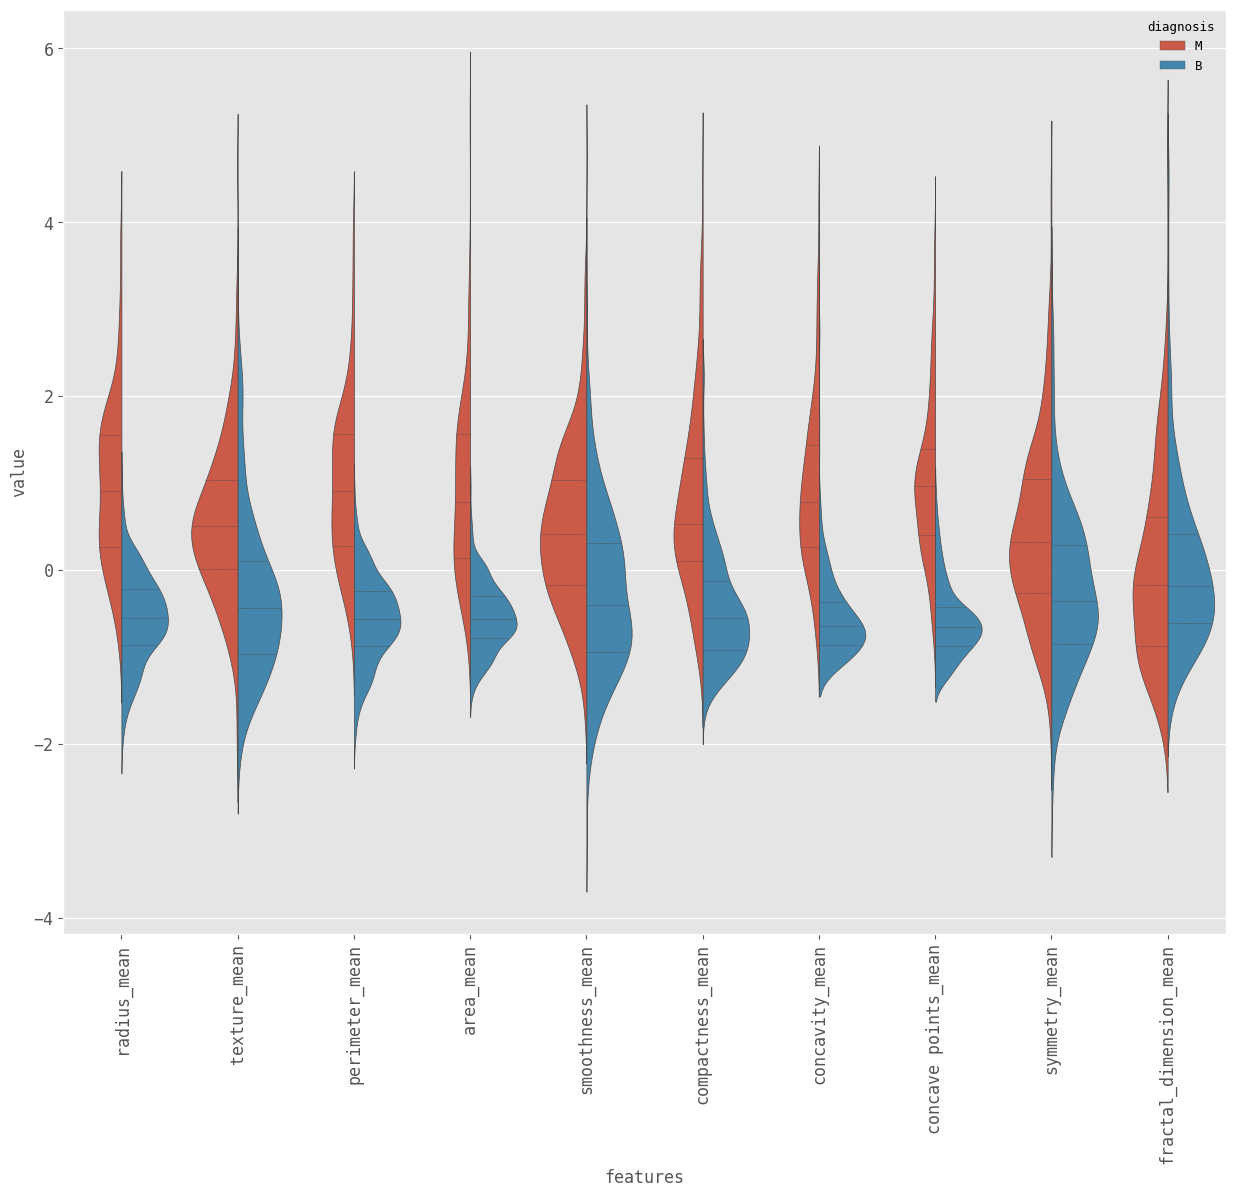

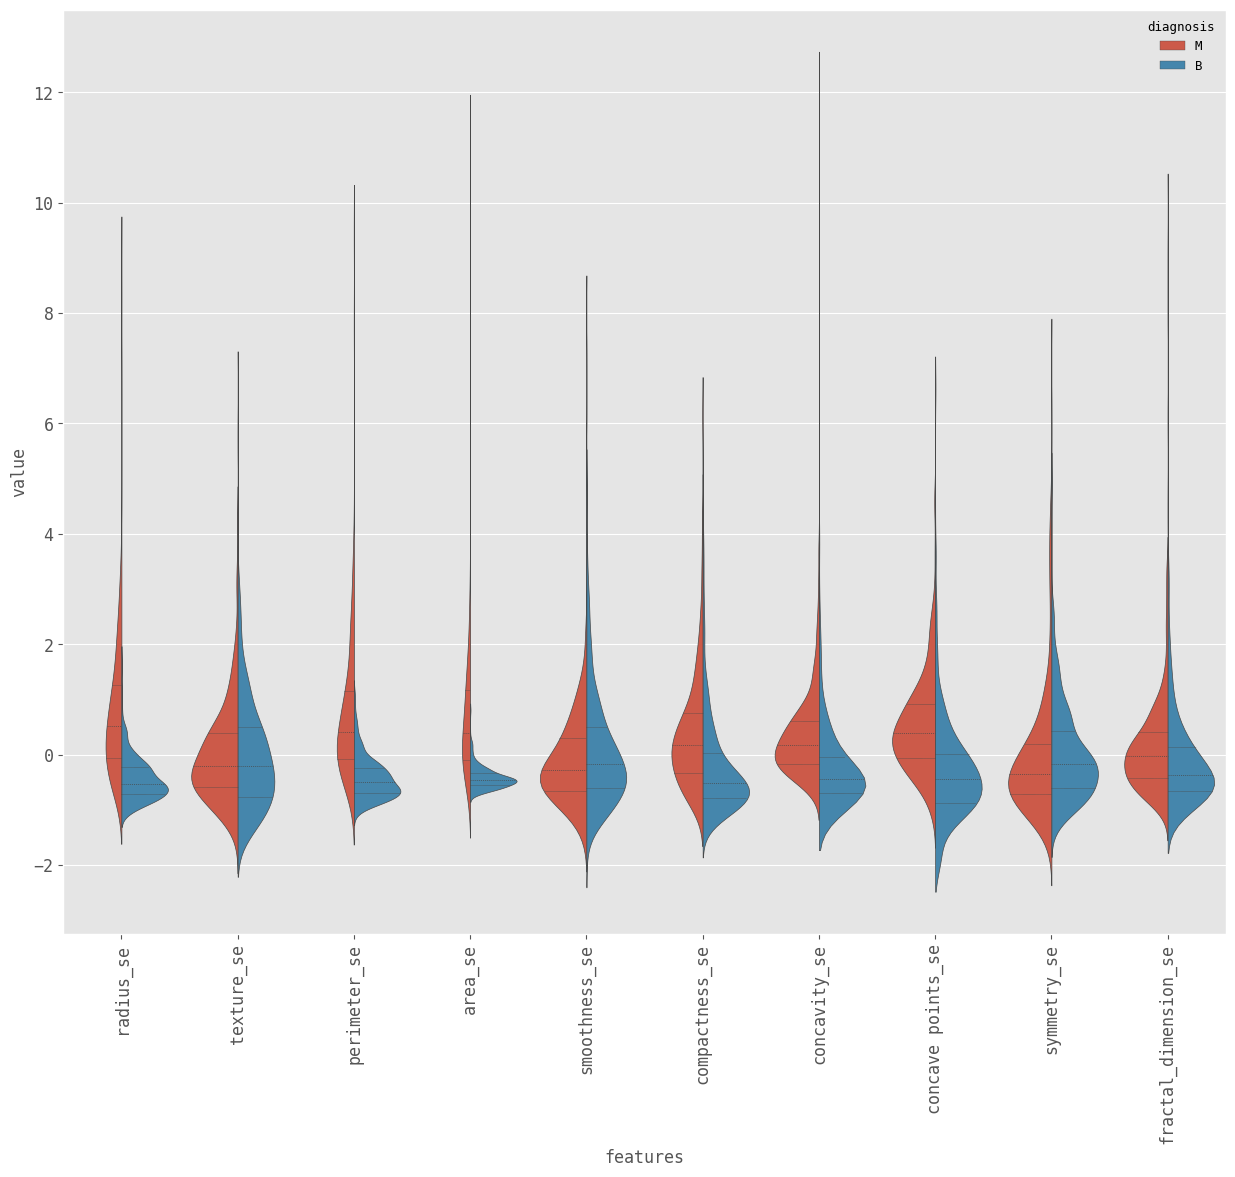

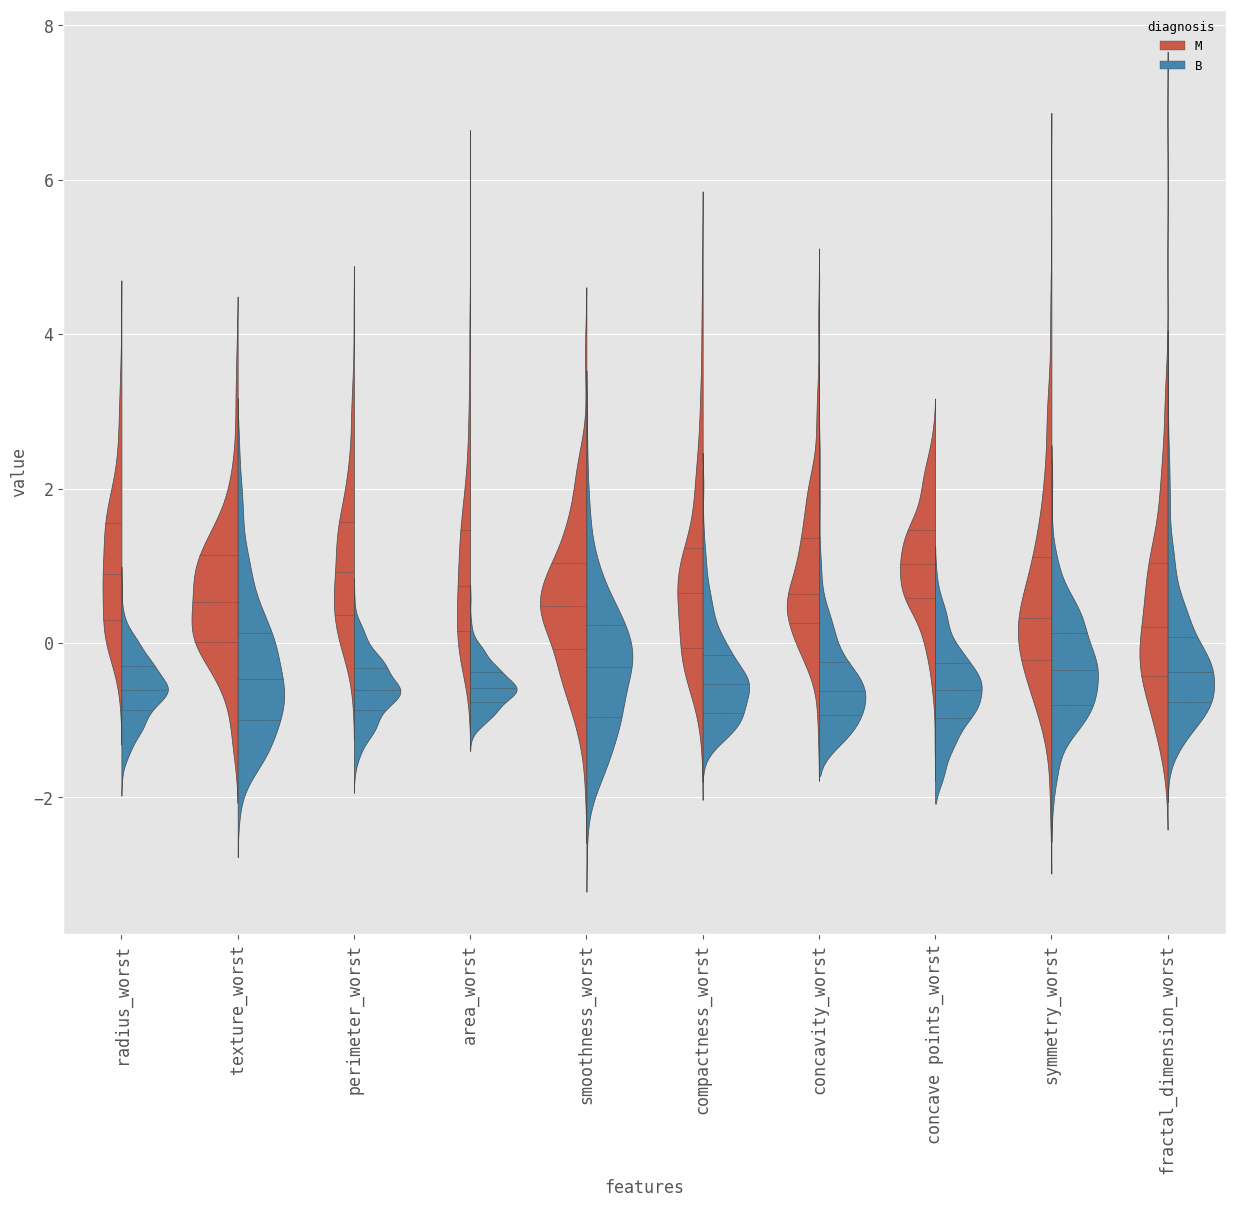

In [16]:
violinplot(data_norm, data_diag, 0, 10)
violinplot(data_norm, data_diag, 10, 20)
violinplot(data_norm, data_diag, 20, 30)

#### *The above plots show us which variables have distinct distributions under M and B conditions, and so we can rely on such variables for the classification. For eg., radius_se*

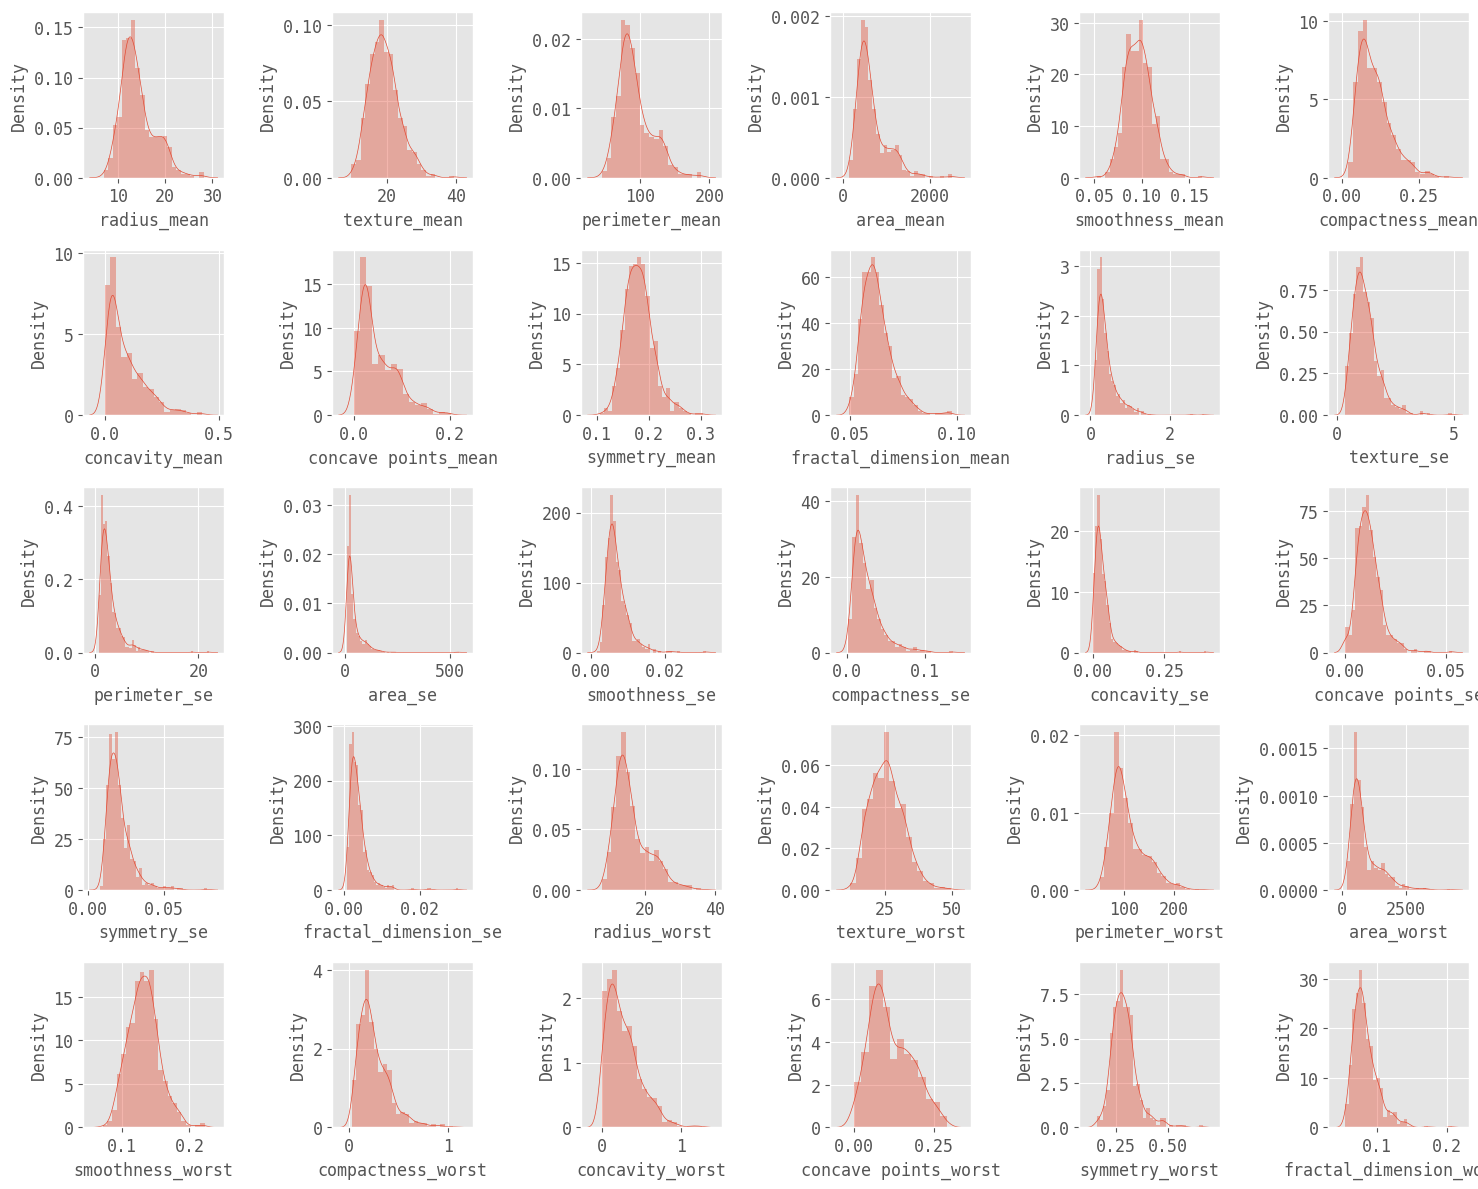

In [17]:
# Data distribution
plotnumber = 1
for column in X:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

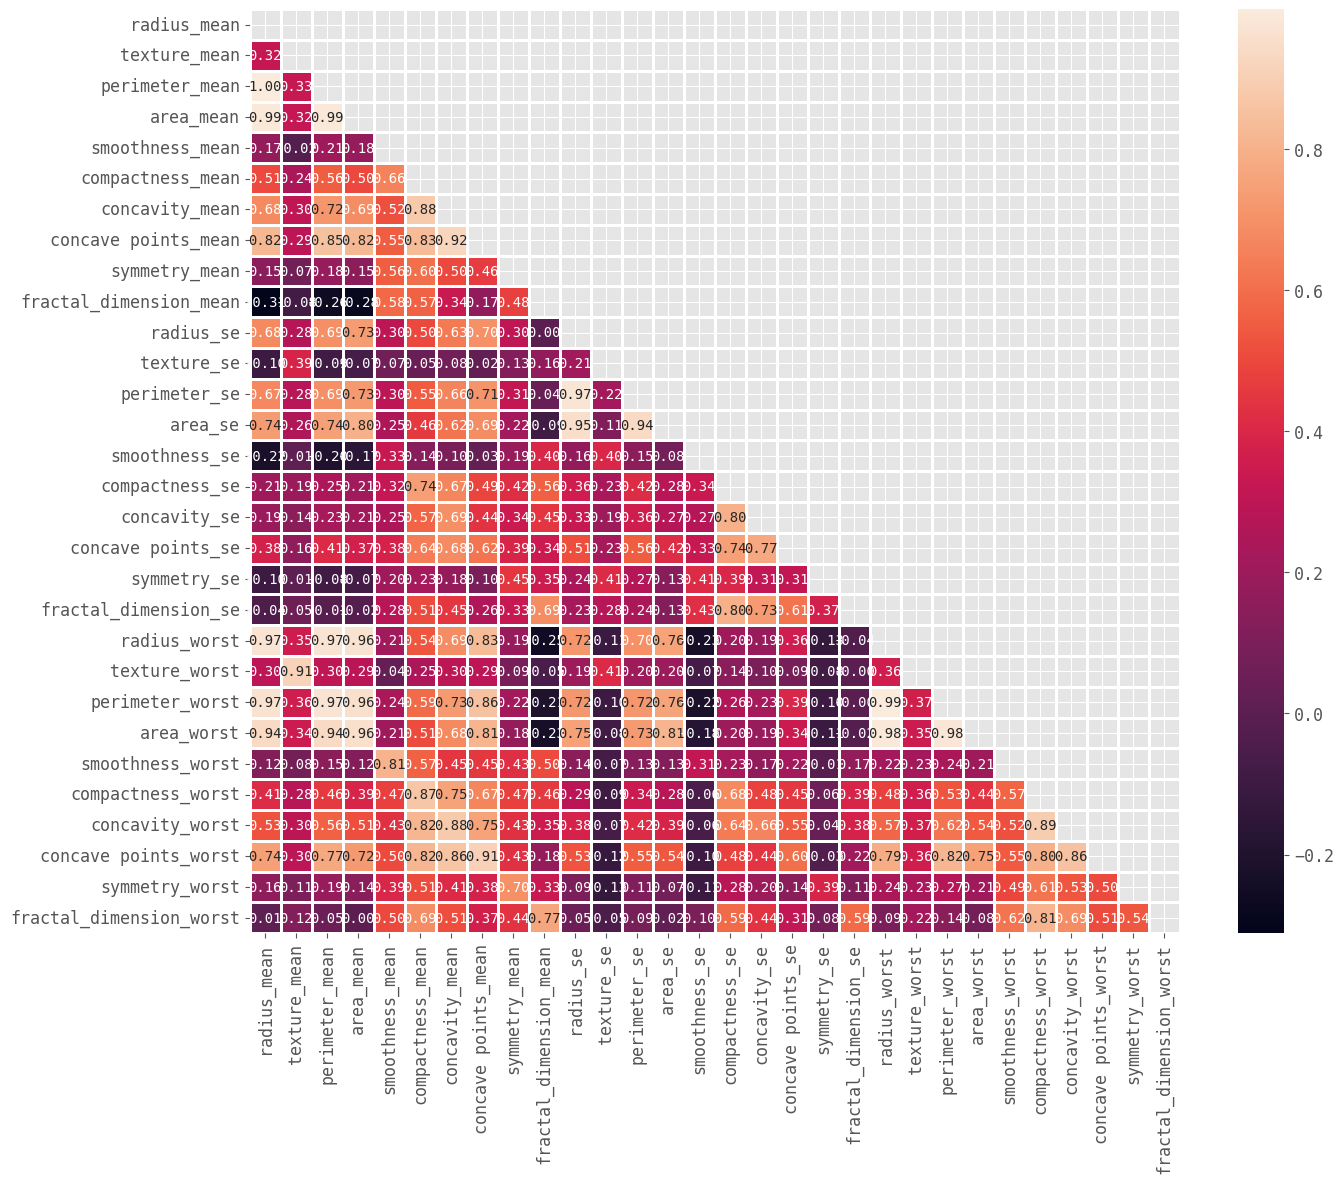

In [18]:
# Correlations 
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

- You can clearly see that several columns are very highly correlated, causing multicollinearity among independent variables. We need to remove the highly correlated features in the preprocessing steps.

- ***Data preprocessing EDA*** helps us to gain insight into our dataset. In preprocessing, we use these insights to wrangle the data.

- ***Label Encoding*** In order for a machine learning algorithm to work with your data, it is important that all values are entrerd in a numerical `machine-readable` form. We need to first explore the datatypes present in our dataset. A label encoder converts human-readable labels into numerical ones. In our case the 'M' and 'B' entries would be converted into 1 & 0 respectively.

In [19]:
# convert labels to machine readable (numerical) form
breast_cancer.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [20]:
breast_cancer['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [21]:
labelencoder = LabelEncoder()
breast_cancer['diagnosis'] = labelencoder.fit_transform(breast_cancer['diagnosis'].values)
breast_cancer.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


### Remove highly correlated features

In [22]:
# We split the pre-processed data into independent & dependent variables for further processing
X = breast_cancer.drop('diagnosis', axis = 1)
Y = breast_cancer['diagnosis']

In [23]:
# removing highly correlated features
corr_matrix = X.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.85)]
breast_cancer = breast_cancer.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {breast_cancer.shape[1]} columns.")

The reduced dataframe has 18 columns.


#### Remove any Null values

In [24]:
# drop any null values
X.dropna(axis=1, inplace=True)
# check if there is null values
X.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# **Split Dataset** 
- We need data to build the model and then data to validate the model. For this purpose we split out dataset into a training set and a test set, respectively. So that we get the same split every tim this notebook is run, we will set random_state as a fixed number. This is considered good practice.

In [25]:
# Split dataset into training(75%) and testing(25%)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state = 1)

# Feature Scaling:
 We need to bring our feature values within a comparable range, while still maintaining their independence. For this we will use the fit_transform method on the training dataset. This method learns about our data (mean and variance) and then uses this information to transform the data into a zero mean, unit variance range. We use the same information to tranform the test data as well, instead of learning the test data as well, so that the model still is 'surprised' by the test data (so no-peeking!)

In [26]:
# scale data to be within a certain range
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # fit method: learns about data, transform: uses (x-mean)/sd to transform data into a zero mean varance 1 range
X_test = sc.transform(X_test) # use mean and sd obtained in previous step

### ***Choosing a Machine Learning Model***
- We choose the machine learning model according to the problem we are trying to solve. Since our data is already labeled (Malignant/Benign), we will use the supervised learning approach. Two different kinds of problems in supervised learning are classification and regression. Since our aim is to categorize the data into malignant or benign, we are dealing with a classification problem.
Here, we will use a logistic regression model.

### ***What is Logistic Regression?***
- A linear model for classification and predictive analysis
- Assesses the probability of an event occuring. using a sigmoid function
- Also known as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier
- Assumes linearity between independent and dependent variables

![Alt text](image.png)

### Logistic Regression:
Now we build our logistic regression model. Again, random_state set to a fixed number ensures we get the same result every time.

In [27]:
# Build a logistic regression classifier
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [28]:
Y_predictions = classifier.predict(X_test)
Y_predictions

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

### ***Performance Evaluation***
 Now that we have our model, it is important to do a basic evaluation, to see how our model is performing. The confusion matrix gives you the overview of type I & II erros and true positives & negatives.

<Axes: >

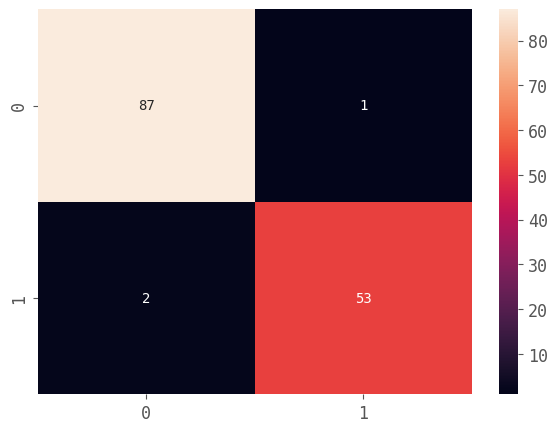

In [29]:
# Confusion matrix
plt.figure(figsize=(7,5))
cm = confusion_matrix(Y_test, Y_predictions)
sns.heatmap(cm, annot=True)

In [30]:
# Accuracy score for model
print(accuracy_score(Y_train, classifier.predict(X_train)))

log_reg_acc = accuracy_score(Y_test, classifier.predict(X_test))
print(log_reg_acc)

0.9906103286384976
0.9790209790209791


In [31]:
# classification report
print(classification_report(Y_test, Y_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        88
           1       0.98      0.96      0.97        55

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

